In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install h5py matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pathlib import Path
import h5py
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam, SGD

print(f'torch version: {torch.__version__}')


torch version: 1.13.1+cu116


In [4]:
import os
os.chdir("/content/drive/MyDrive/ecg")
project_path = Path.cwd()
print(f'project_path: {project_path}')

project_path: /content/drive/MyDrive/ecg


In [5]:
# paths to files and directories
train_name = 'train_ecg.hdf5'
test_name = 'test_ecg.hdf5'

In [6]:
class ECGDataset(Dataset):
    # The class used to load the ECG dataset
    def __init__(self, mode='train'):
        if mode == 'train':
            with h5py.File(project_path/train_name, 'r') as hdf:
                self.x = torch.tensor(hdf['x_train'][:], dtype=torch.float)
                self.y = torch.tensor(hdf['y_train'][:])
        elif mode == 'test':
            with h5py.File(project_path/test_name, 'r') as hdf:
                self.x = torch.tensor(hdf['x_test'][:], dtype=torch.float)
                self.y = torch.tensor(hdf['y_test'][:])
        else:
            raise ValueError('Argument of mode should be train or test')
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [7]:
train_dataset = ECGDataset(mode='train')
test_dataset = ECGDataset(mode='test')

In [8]:
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))
x_train, y_train = next(iter(train_loader))
x_test, y_test = next(iter(test_loader))
print(f'x_train: {type(x_train)}, {x_train.size()}')
print(f'y_train: {type(y_train)}, {y_train.size()}')
print(f'x_test: {type(x_test)}, {x_test.size()}')
print(f'y_test: {type(y_test)}, {y_test.size()}')

x_train: <class 'torch.Tensor'>, torch.Size([13245, 1, 128])
y_train: <class 'torch.Tensor'>, torch.Size([13245])
x_test: <class 'torch.Tensor'>, torch.Size([13245, 1, 128])
y_test: <class 'torch.Tensor'>, torch.Size([13245])


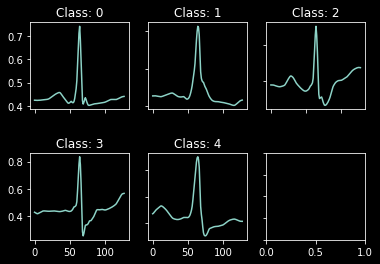

In [10]:
def plot_ecg():
    x = np.arange(0, 128)
    fig, axs = plt.subplots(2, 3)
    axs[0, 0].plot(x_train[10].view(-1))
    axs[0, 0].set_title(f'Class: {y_train[10]}')
    axs[0, 1].plot(x_train[18].view(-1))
    axs[0, 1].set_title(f'Class: {y_train[18]}')
    axs[0, 2].plot(x_train[12].view(-1))
    axs[0, 2].set_title(f'Class: {y_train[12]}')
    axs[1, 0].plot(x_train[14].view(-1))
    axs[1, 0].set_title(f'Class: {y_train[14]}')
    axs[1, 1].plot(x_train[17].view(-1))
    axs[1, 1].set_title(f'Class: {y_train[17]}')

    fig.subplots_adjust(hspace=0.5)
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

plot_ecg()

In [12]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam, SGD

#  define the model
class PatternModel(nn.Module):
    def __init__(self,n_class = 5):
        #TODO

    def forward(self, x):
        #TODO


In [19]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

# parameters. TODO

In [22]:


# train the model. TODO



epoch : 0
total loss : 398.5961580276489, average loss : 0.9627926522406979
epoch : 1
total loss : 398.40130120515823, average loss : 0.9623219835873388
epoch : 2
total loss : 398.02665638923645, average loss : 0.9614170444184456
epoch : 3
total loss : 398.2939032316208, average loss : 0.9620625681923207
epoch : 4
total loss : 398.032595872879, average loss : 0.9614313909972924
epoch : 5
total loss : 399.1735814809799, average loss : 0.964187394881594
epoch : 6
total loss : 398.51103633642197, average loss : 0.9625870442908743
epoch : 7
total loss : 398.3583135008812, average loss : 0.9622181485528531
epoch : 8
total loss : 398.88981598615646, average loss : 0.9635019709810543
epoch : 9
total loss : 398.4366019964218, average loss : 0.9624072511990865
epoch : 10
total loss : 398.1698875427246, average loss : 0.9617630133882237
epoch : 11
total loss : 398.1259250640869, average loss : 0.9616568238262969
epoch : 12
total loss : 398.1721561551094, average loss : 0.9617684931282836
epoch :

In [23]:
## test the model. TODO


accuracy : 0.983842959607399
mistakes : [110, 112, 133, 316, 376, 449, 506, 517, 550, 560, 631, 688, 875, 883, 962, 1035, 1087, 1096, 1162, 1182, 1286, 1452, 1503, 1522, 1542, 1613, 1622, 1715, 1857, 1880, 1895, 2017, 2025, 2076, 2099, 2106, 2179, 2191, 2490, 2552, 2704, 2773, 2816, 2869, 2923, 2950, 3074, 3091, 3161, 3195, 3340, 3506, 3528, 3739, 3772, 3937, 3938, 3985, 4050, 4057, 4086, 4312, 4381, 4414, 4473, 4509, 4534, 4666, 4674, 4727, 4734, 4802, 4810, 4834, 4842, 4929, 5033, 5098, 5153, 5161, 5184, 5214, 5233, 5348, 5349, 5382, 5435, 5482, 5737, 5753, 5763, 5785, 5790, 5861, 5893, 5900, 5933, 5934, 5963, 6167, 6300, 6357, 6377, 6464, 6585, 6629, 6744, 6776, 6812, 6874, 6937, 7017, 7062, 7075, 7170, 7175, 7358, 7411, 7432, 7435, 7475, 7491, 7602, 7746, 7780, 7883, 7934, 7949, 7951, 7975, 8058, 8159, 8323, 8379, 8387, 8446, 8473, 8486, 8517, 8553, 8592, 8760, 8816, 8833, 9001, 9037, 9210, 9252, 9277, 9343, 9429, 9496, 9536, 9557, 9572, 9635, 9687, 9775, 9794, 9972, 9984, 10008, 1